In [46]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [11]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

id_list = test_df['PassengerId']


In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
def cabin_extract(data):
    data.Cabin = data.Cabin.fillna('X')
    data.Cabin = data.Cabin.apply(lambda x: str(x)[0])
    data.Cabin = data.Cabin.replace(['A', 'D', 'E', 'T'], 'M')
    data.Cabin = data['Cabin'].replace(['B', 'C'], 'H')
    data.Cabin = data['Cabin'].replace(['F', 'G'], 'L')
    data.Cabin = data.Cabin.map({"X":0, "L":1, "M":2, "H":3}).astype(int)
    return data

In [18]:
#train_df = cabin_extract(train_df)
#test_df = cabin_extract(test_df)

In [26]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,3,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


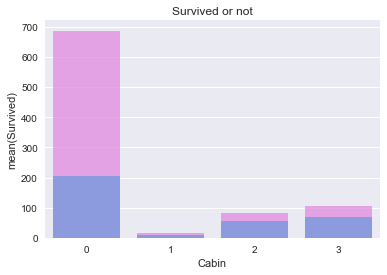

,Fare
Cabin,
0,19.157325
1,17.493135
2,49.281278
3,106.072642


In [53]:
ax = plt.axes()
data = train_df.groupby(['Cabin'])[['Survived']].count()
sns.barplot(x=data.index, y=data.Survived, alpha=0.8, color='violet', ax=ax)
data = train_df.groupby('Cabin')[['Survived']].sum()
sns.barplot(x=data.index, y=data.Survived, alpha=0.8, color='cornflowerblue', ax=ax)
ax.set_title('Survived or not');
sns.plt.show()

train_df.groupby('Cabin')[['Fare']].mean()

In [ ]:
train_df = train_df.drop(["PassengerId","Name", "Ticket", "Cabin"], axis=1);
test_df = test_df.drop(['PassengerId', 'Name', "Ticket", 'Cabin'], axis=1);

In [ ]:
train_df.head()

In [ ]:
test_df.head()

In [ ]:
train_df.info()

In [ ]:
test_df.info()

In [ ]:
def feature_normalization(feature_vector):
    # scale to [-1, +1]
    max_value = max(feature_vector)
    min_value = min(feature_vector)
    mean_value = feature_vector.mean()
    return (feature_vector - mean_value) / (max_value - min_value)

def dummy(data, columns):
    for column in columns:
        if column not in data.columns:
            continue
        dummy_data = pd.get_dummies(data[column], drop_first=False)
        num = len(dummy_data.loc[0,:])
        #dummy_data.columns = [column+"_"+str(x+1) for x in range(num)]
        data = pd.concat([data, dummy_data], axis=1)
        data = data.drop(column, axis=1)
    return data


In [ ]:
train_df = dummy(train_df, ['Sex', "Embarked", 'Pclass'])
test_df = dummy(test_df, ['Sex', 'Embarked', 'Pclass'])
train_df.head()

In [ ]:
train_df.loc[train_df.Age.isnull()]

In [ ]:
def fare(data):
    data.loc[data.Fare.isnull(), 'Fare'] = data['Fare'].mean()
    data.Fare.astype(int)
    return data

def age(data):
    most = data.Age.mode()[0]
    data.loc[data.Age.isnull(), 'Age'] = most
    data.Age.astype(int)
    return data

test_df = fare(test_df)
train_df = age(train_df)
test_df = age(test_df)

In [ ]:
train_df.info()

In [ ]:
test_df.info()

In [ ]:
train_df.head()

In [ ]:
model = LogisticRegression()
model.fit(train_df.drop('Survived', axis=1), train_df.Survived)
predictions = model.predict(test_df)

In [ ]:
data_d = {"PassengerId":id_list, "Survived":predictions}
output = pd.DataFrame(data_d)
output.to_csv("predictions.csv", index=False)